- **Contexto y objetivos**: 

El objetivo de este proyecto es analizar la eficiencia operativa de las rutas de entrega,
identificando desbalances entre las zonas de los restaurantes y las zonas de los clientes.

A través del análisis de pedidos, tiempos de entrega y modos de entrega, se buscan
oportunidades para optimizar la asignación de zonas y reducir los tiempos promedio
de entrega.

- **Preprocesamiento de datos**:
-   Paso 1. Estudiar la información contenida en los archivos
-   Paso 2. Preparar los datos
-   Paso 3. Convertir los datos en los tipos necesarios.
-   Paso 4. Encontrar y eliminar errores en los datos. Explicar errores encontrados y por que los eliminaste o dejaste

- **Análisis exploratorio**: entender los datos con los que trabajare, revisar datos atípicos para descartar y no provoquen métricas erróneas durante el analisis

- **Que buscaras en este proyecto**:
-   identificar a que zonas envian pedidos cada sucursal
-   Cual es el tiempo promedio de entrega de los pedidos
-   Cual es el mejor medio o vehiculo para realizar las entregas
-   Identificar las posibilidades de mejora en los tiempos de entregar
-   Utiliza gráficos para hacer mas entendible los resultados
-   Saca conclusiones basadas en cada gráfico y explica los resultados

- **Conclusiones y recomendaciones**: 
•   Describir conclusiónes sobre los resultados obtenidos y redactar las observaciones sobre como se puede mejorar la eficiencia en las zonas de entrega

## Inicializacion

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
route_efficiency = pd.read_csv("data\Food_Delivery_Route_Efficiency_Dataset.csv")
print(route_efficiency)
route_efficiency.info()

     order_id  distance_km  delivery_time_min traffic_level  route_length_km  \
0           1         7.97               63.8          High             9.75   
1           2         0.90                7.6          High             1.28   
2           3        11.12               78.0        Medium            16.65   
3           4         4.90               24.8           Low             5.25   
4           5        10.04               56.0          High            11.34   
..        ...          ...                ...           ...              ...   
195       196         9.02               38.4           Low             9.57   
196       197         6.73               59.2           Low            10.04   
197       198         6.98               51.4          High             7.83   
198       199         3.80               29.2        Medium             5.34   
199       200         6.55               40.8        Medium             7.72   

    delivery_mode weather        order_

El data set se encuentra limpio, sin detalles a corregir, no hay valores nulos, creare dos columnas nuevas una para la fecha y otra para la hora con el finde poder realizar agrupamientos por fecha de ser necesario o por hora procederemos a hacer analisis sobre lo encontrado.

In [21]:
route_efficiency.duplicated().sum()

np.int64(0)

No se encontraron valores duplicados

In [22]:
print(route_efficiency['delivery_mode'].unique())
print()
print(route_efficiency['weather'].unique())
print()
print(route_efficiency['restaurant_zone'].unique())
print()
print(route_efficiency['customer_zone'].unique())


['Bicycle' 'Car' 'Bike' 'Scooter']

['Clear' 'Cloudy' 'Rainy' 'Windy']

['South' 'West' 'Central' 'North' 'East']

['North' 'Central' 'West' 'South' 'East']


In [23]:
route_efficiency['order_time'] = pd.to_datetime(route_efficiency['order_time'], errors='coerce')
route_efficiency['date'] = route_efficiency['order_time'].dt.date
route_efficiency['time'] = route_efficiency['order_time'].dt.time

In [24]:
route_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           200 non-null    int64         
 1   distance_km        200 non-null    float64       
 2   delivery_time_min  200 non-null    float64       
 3   traffic_level      200 non-null    object        
 4   route_length_km    200 non-null    float64       
 5   delivery_mode      200 non-null    object        
 6   weather            200 non-null    object        
 7   order_time         200 non-null    datetime64[ns]
 8   restaurant_zone    200 non-null    object        
 9   customer_zone      200 non-null    object        
 10  date               200 non-null    object        
 11  time               200 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 18.9+ KB


-   Paso 1. Identificar a cuantos y que zonas envian pedidos cada sucursal
-   Utiliza gráficos para hacer mas entendible los resultados
-   Saca conclusiones basadas en cada gráfico y explica los resultados

In [25]:
columns = ['restaurant_zone', 'customer_zone']
df_orders_rest = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_rest = df_orders_rest.rename(columns={'count': 'orders_count'})
print(df_orders_rest.head(25))

   restaurant_zone customer_zone  orders_count
0          Central       Central             7
1          Central          East            10
2          Central         North             9
3          Central         South            11
4          Central          West            10
5             East       Central             5
6             East          East             8
7             East         North             7
8             East         South             4
9             East          West             4
10           North       Central             8
11           North          East             6
12           North         North             6
13           North         South             3
14           North          West             7
15           South       Central            10
16           South          East            12
17           South         North            11
18           South         South            11
19           South          West            10
20           

<Axes: xlabel='customer_zone', ylabel='restaurant_zone'>

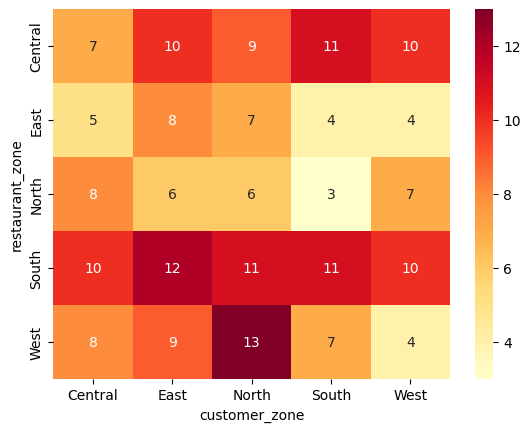

In [26]:
sns.heatmap(
    route_efficiency.pivot_table(
        index='restaurant_zone',
        columns='customer_zone',
        values='order_id',
        aggfunc='count'
    ),
    annot=True, fmt='d', cmap='YlOrRd'
)

Es visible que todos los restaurabtes atienden todas las zonas sin importar su ubicacion, esto lleva a que los tiempos de traslado puedan ser mas largos de lo esperado por atender zonas mas lejanas. El restaurant de la zona central, podria atender a todas las zonas por tener la facilidad de encontarse al centro de la ciudad, en cambio el restaurant de la zona norte tiene tiene apenas 6 pedidos en su zona, mientras en la sur, que seria hasta el otro extremo de la ciudad 11 pedidos y 13 a la zona oeste.

In [27]:
# Tiempo promedio de entrega por combinación restaurante-zona cliente

avg_delivery_time = route_efficiency.groupby(
    ['restaurant_zone', 'customer_zone']
)['delivery_time_min'].mean().reset_index()

avg_delivery_time.sort_values(by='delivery_time_min', ascending=False).head()

,restaurant_zone,customer_zone,delivery_time_min
13,North,South,66.866667
8,East,South,60.625000
10,North,Central,54.575000
6,East,East,52.400000
21,West,East,52.055556


### Interpretación inicial

Las combinaciones de restaurante-zona cliente con mayor tiempo promedio de entrega
representan posibles focos de ineficiencia operativa, ya que implican recorridos
más largos o una asignación subóptima de zonas.

In [28]:
# Pedidos fuera de la zona "natural" del restaurante

inefficient_orders = route_efficiency[
    route_efficiency['restaurant_zone'] != route_efficiency['customer_zone']
]

inefficiency_rate = len(inefficient_orders) / len(route_efficiency) * 100

print(f"Porcentaje de pedidos fuera de la zona del restaurante: {inefficiency_rate:.2f}%")


Porcentaje de pedidos fuera de la zona del restaurante: 82.00%


In [29]:
inefficient_orders['restaurant_zone'].value_counts(normalize=True) * 100

restaurant_zone
South      26.219512
Central    24.390244
West       22.560976
North      14.634146
East       12.195122
Name: proportion, dtype: float64

### El resultado anterior nos muestra el porcentaje de pedidos de cada restaurante fuera de su zona

## 🧾 Conclusiones

- Se identificaron desbalances entre las zonas de los restaurantes y las zonas de los clientes.
- Un porcentaje relevante de los pedidos se realiza fuera de la zona natural del restaurante,
lo que sugiere oportunidades de mejora en la asignación de zonas y en la eficiencia operativa.

-   Paso 2. Cual es el tiempo promedio de entrega de los pedidos

In [30]:
columns = ['restaurant_zone', 'customer_zone']
df_time_prom = route_efficiency.groupby(columns)['delivery_time_min'].mean().reset_index()
df_time_prom = df_time_prom.rename(columns={'delivery_time_min': 'delivery_time_average'})
print(df_time_prom.head(25))

   restaurant_zone customer_zone  delivery_time_average
0          Central       Central              43.185714
1          Central          East              49.950000
2          Central         North              32.022222
3          Central         South              46.927273
4          Central          West              45.490000
5             East       Central              44.800000
6             East          East              52.400000
7             East         North              50.142857
8             East         South              60.625000
9             East          West              46.525000
10           North       Central              54.575000
11           North          East              50.216667
12           North         North              42.033333
13           North         South              66.866667
14           North          West              22.571429
15           South       Central              44.190000
16           South          East              35

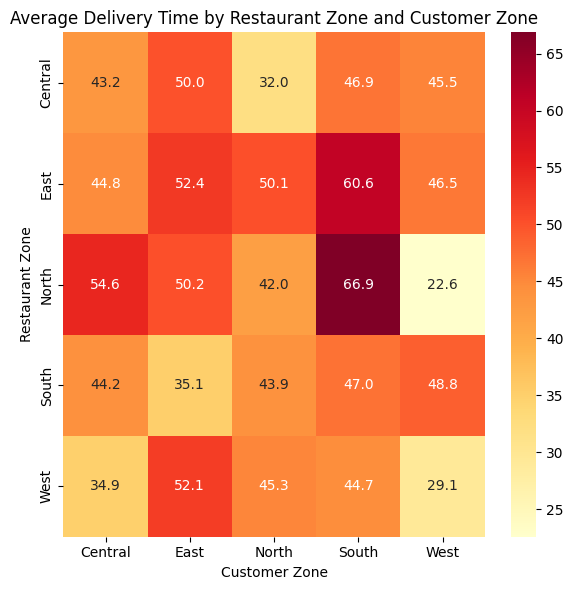

In [31]:
plt.figure(figsize=(6,6))

heatmap_data = df_time_prom.pivot_table(
    index='restaurant_zone',
    columns='customer_zone',
    values='delivery_time_average',
    aggfunc='mean'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd'
)

plt.title("Average Delivery Time by Restaurant Zone and Customer Zone")
plt.xlabel("Customer Zone")
plt.ylabel("Restaurant Zone")
plt.tight_layout()
plt.show()


Son notables los tiempos de entrega a cada zona por parte de cada restaurant, incluso se nota que el restaurant de la zona oeste tiene mejores tiempo de entrega de manera general comparado con todos los demas restaurantes, incluso para llevar un pedido hasta la zona mas lejana que seria el este, donde tarda en llegar 45 minutos promedio

-   Paso 3. Cual es el mejor medio o vehiculo para realizar las entregas mas rapido.

In [32]:
columns = ['customer_zone','delivery_mode']
df_delivery_mode = route_efficiency.groupby(columns).agg({'order_id': 'count', 'delivery_time_min': 'mean'}).reset_index()
df_delivery_mode = df_delivery_mode.rename(columns={'order_id' : 'order_count' ,'delivery_time_min': 'delivery_time_average'})
print(df_delivery_mode.head(20))

   customer_zone delivery_mode  order_count  delivery_time_average
0        Central       Bicycle           13              50.823077
1        Central          Bike           11              46.036364
2        Central           Car            7              35.942857
3        Central       Scooter            7              37.885714
4           East       Bicycle           13              54.107692
5           East          Bike            9              40.577778
6           East           Car           11              39.172727
7           East       Scooter           12              50.866667
8          North       Bicycle           10              37.710000
9          North          Bike           10              38.880000
10         North           Car           13              46.053846
11         North       Scooter           13              46.030769
12         South       Bicycle            6              47.983333
13         South          Bike           10              46.61

### Análisis cruzado por zonas y modo de entrega

A continuación se presentan visualizaciones que permiten analizar la relación entre
las zonas de los restaurantes, las zonas de los clientes y los modos de entrega,
con el fin de identificar patrones operativos y posibles ineficiencias.

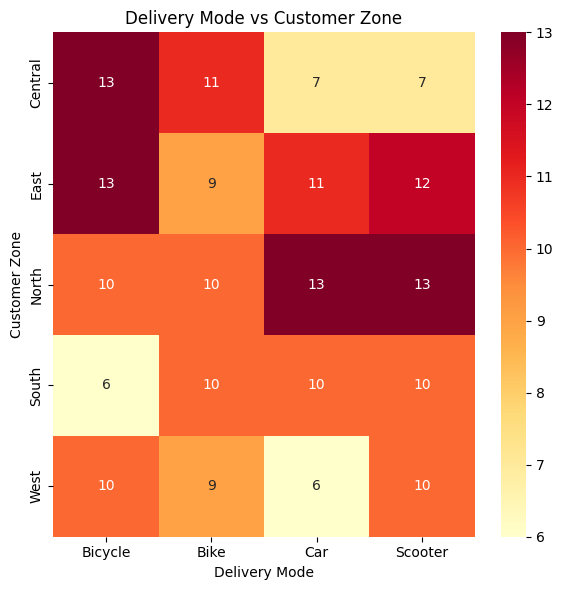

In [33]:
plt.figure(figsize=(6,6))

heatmap_data = df_delivery_mode.pivot_table(
    index='customer_zone',
    columns='delivery_mode',
    values='order_count',
    aggfunc='sum'
).astype(int)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlOrRd'
)

plt.title("Delivery Mode vs Customer Zone")
plt.xlabel("Delivery Mode")
plt.ylabel("Customer Zone")
plt.tight_layout()
plt.show()

### Análisis por modo de entrega (visión general)

Al comparar los modos de entrega por zona de cliente y restaurante,
se observa que los patrones son consistentes entre las distintas zonas
operativas.

Dado que las diferencias entre restaurantes son mínimas, se opta por
presentar un único heatmap general, el cual resume de manera clara
el comportamiento global de los modos de entrega sin introducir
redundancia visual.

In [ ]:
# Ordenes atendidas por cada restaurante
columns = ['restaurant_zone']
df_orders_restaurant = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_restaurant = df_orders_restaurant.rename(columns={'count': 'orders_rest'})
df_orders_restaurant = df_orders_restaurant.rename(columns={'restaurant_zone': 'zone'})
print(df_orders_restaurant)

      zone  orders_rest
0  Central           47
1     East           28
2    North           30
3    South           54
4     West           41


In [ ]:
# Ordenes generadas por zona/cliente
columns = ['customer_zone']
df_orders_zone = route_efficiency.groupby(columns)['order_id'].agg(['count']).reset_index()
df_orders_zone = df_orders_zone.rename(columns={'count': 'orders_zone'})
df_orders_zone = df_orders_zone.rename(columns={'customer_zone': 'zone'})
print(df_orders_zone)

      zone  orders_zone
0  Central           38
1     East           45
2    North           46
3    South           36
4     West           35


In [48]:
df_union = df_orders_restaurant.merge(df_orders_zone, on='zone', how='inner')
print(df_union)

      zone  orders_rest  orders_zone
0  Central           47           38
1     East           28           45
2    North           30           46
3    South           54           36
4     West           41           35


<Axes: xlabel='zone', ylabel='orders_rest'>

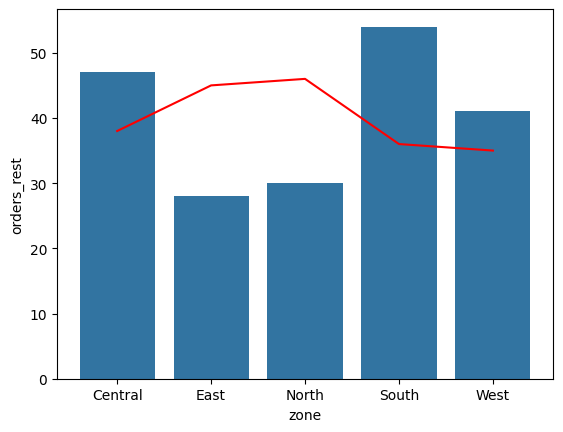

In [49]:
sns.barplot(data=df_union, x="zone", y='orders_rest')
sns.lineplot(data=df_union, x="zone", y='orders_zone', color='red')

## Conclusiones y sugerencias

-   El 38% de pedidos del restaurante Central provienen de zonas que podrían ser atendidas por sucursales más cercanas, esto incrementa el tiempo promedio de entrega de cada restaurant.
-   La grafica superior nos deja claro que los restaurantes de la zona este y norte reciben menos pedidos a domicilio, mas son las mismas zonas las que generan pedidos atendidos por los restaurantes de las zonas distintas.
-   La zona Central es la que puede tener un area de influencia mas grande.
-   Si un restaurant se carga de pedidos en su zona y no puede atenderlos puede derivarlos al restaurant mas cercano en zonas triangulares.
-       Ejemplo, si hablamos de pedidos rebasados en la zona norte, pueden atender, en orden de ubicacion, los que queden mas cercanos a las zonas mas cercanas, que serian la central, la este y la oeste, quedaria completamente descargado el restaurant de la zona sur para para atender pedidos de la zona norte

-   Hecho esto se puede mejorar tambien la forma de uso de los 4 medios que se usan para la entrega, menor cantidad y mas cercano, usar bicicleta o motoneta. Si son pedidos con ordenes mas grandes o mas lejanos, enviar por medio de motocicleta o auto.

-   Con estos cambios se pueden mejorar de manera importante los tiempos de entrega.